In [10]:
import numpy as np
import pandas as pd

In [11]:
import os

root_dir = "D:/vhproj/Ton_IoT"
datadir = "data/TON/train_test_network.csv"

path = os.path.join(root_dir, datadir)

print(path)


D:/vhproj/Ton_IoT\data/TON/train_test_network.csv


In [12]:
# Read data and cleaning
df = pd.read_csv(path)
df.replace('-', np.nan, inplace=True)
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].astype(str).str.strip()



In [13]:
print(df.columns)


Index(['src_ip', 'src_port', 'dst_ip', 'dst_port', 'proto', 'service',
       'duration', 'src_bytes', 'dst_bytes', 'conn_state', 'missed_bytes',
       'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_query',
       'dns_qclass', 'dns_qtype', 'dns_rcode', 'dns_AA', 'dns_RD', 'dns_RA',
       'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed',
       'ssl_established', 'ssl_subject', 'ssl_issuer', 'http_trans_depth',
       'http_method', 'http_uri', 'http_version', 'http_request_body_len',
       'http_response_body_len', 'http_status_code', 'http_user_agent',
       'http_orig_mime_types', 'http_resp_mime_types', 'weird_name',
       'weird_addl', 'weird_notice', 'label', 'type'],
      dtype='object')


In [14]:
# Kích thước của DataFrame (số phần tử)
print(df.size)

# Hoặc nếu bạn muốn biết số hàng và số cột:
print(df.shape)   # (rows, columns)

# Hiển thị 5 dòng đầu tiên
print(df.head(5))


9285892
(211043, 44)
          src_ip  src_port         dst_ip  dst_port proto service    duration  \
0   192.168.1.37      4444  192.168.1.193     49178   tcp     nan  290.371539   
1  192.168.1.193     49180   192.168.1.37      8080   tcp     nan    0.000102   
2  192.168.1.193     49180   192.168.1.37      8080   tcp     nan    0.000148   
3  192.168.1.193     49180   192.168.1.37      8080   tcp     nan    0.000113   
4  192.168.1.193     49180   192.168.1.37      8080   tcp     nan    0.000130   

   src_bytes  dst_bytes conn_state  ...  http_response_body_len  \
0     101568       2592        OTH  ...                       0   
1          0          0        REJ  ...                       0   
2          0          0        REJ  ...                       0   
3          0          0        REJ  ...                       0   
4          0          0        REJ  ...                       0   

   http_status_code  http_user_agent  http_orig_mime_types  \
0                 0        

In [15]:
print(df['label'].value_counts())
print(df['type'].value_counts())


label
1    161043
0     50000
Name: count, dtype: int64
type
normal        50000
backdoor      20000
ddos          20000
dos           20000
injection     20000
password      20000
scanning      20000
ransomware    20000
xss           20000
mitm           1043
Name: count, dtype: int64


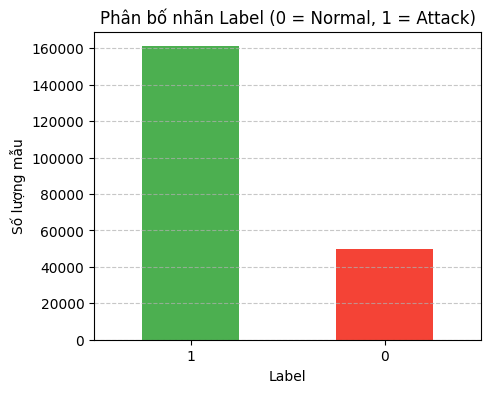

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
df['label'].value_counts().plot(kind='bar', color=['#4CAF50', '#F44336'])
plt.title('Phân bố nhãn Label (0 = Normal, 1 = Attack)')
plt.xlabel('Label')
plt.ylabel('Số lượng mẫu')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


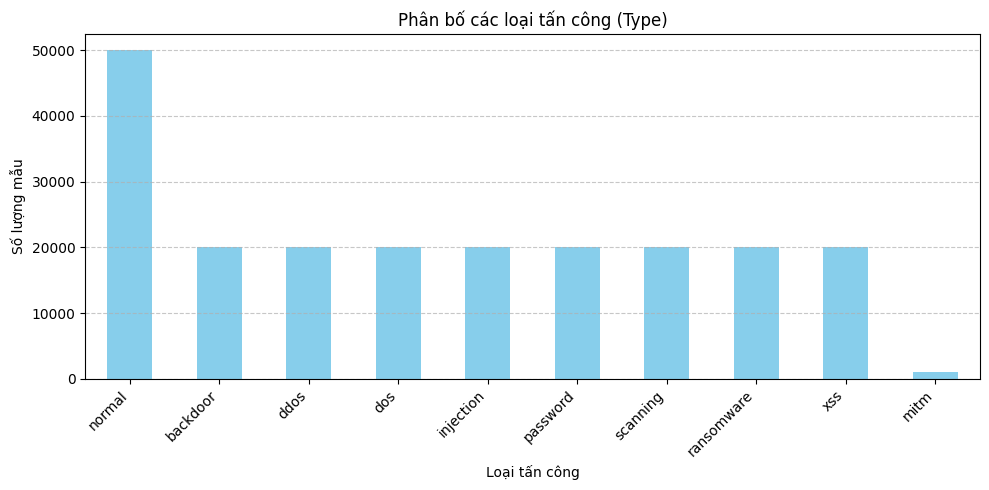

In [17]:
plt.figure(figsize=(10,5))
df['type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Phân bố các loại tấn công (Type)')
plt.xlabel('Loại tấn công')
plt.ylabel('Số lượng mẫu')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


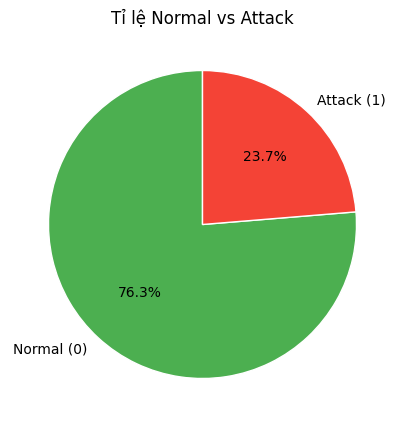

In [18]:
plt.figure(figsize=(5,5))
df['label'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['#4CAF50', '#F44336'],
    labels=['Normal (0)', 'Attack (1)'],
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Tỉ lệ Normal vs Attack')
plt.ylabel('')
plt.show()
